In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
from joblib import load
import numpy as np
import matplotlib.colorbar

In [43]:
hists = np.zeros((3, 1024, 1024))
for i, name in enumerate(['AR', 'QS', 'CH']):
    hists[i], xedges, yedges = load('/data/histogram2d_{}.jl'.format(name))
extent =  list(yedges[1:][[0,-1]]) + list(np.exp(xedges[1:])[[0,-1]])
extent

[-89.82421875, 90.0, 0.0067709275843975385, 1.0]

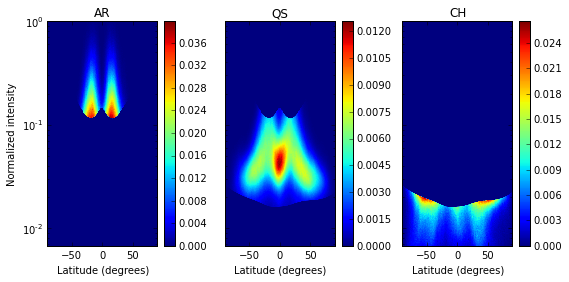

In [172]:
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True)
fig.set_size_inches((8,4))
extent =  list(yedges[1:][[0,-1]]) + list(np.exp(xedges[1:])[[0,-1]])
for i in range(hists.shape[0]):
    axes[i].set_title(['AR','QS','CH'][i])
    #im = axes[i].pcolormesh(yedges[1:], np.exp(xedges[1:]), hists[i])
    im = axes[i].imshow(hists[i], extent=extent, origin='lower')
    axes[i].set_yscale('log')
    axes[i].set_xlabel('Latitude (degrees)')
    axes[i].set_ylim(list(np.exp(xedges[1:])[[0,-1]]))
    fig.colorbar(im, ax=axes[i])
axes[0].set_ylabel('Normalized intensity')

#fig.text(0.5, 0.015, 'Latitude (degrees)', ha='center', va='center')
#fig.text(0.015, 0.5, 'Normalized intensity', ha='center', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig('/home/rubendv/Downloads/intensity_latitude_given_segmentation.pdf')

(-90, 90)

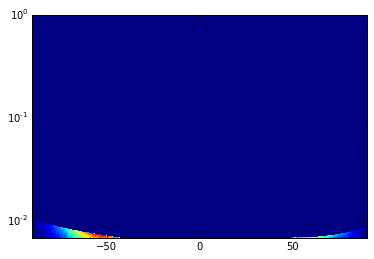

In [45]:
plt.pcolormesh(yedges[1:], np.exp(xedges[1:]), hist_ch)
plt.yscale('log')
plt.ylim([np.exp(xedges[1]), 1])
plt.xlim([-90, 90])

In [138]:
intensity_kernels = load('/data/intensity_kernels.jl')
latitude_likelihoods =  load('/data/latitude_likelihoods.jl')

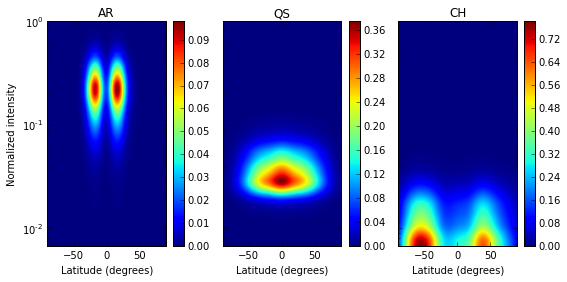

In [171]:
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(8,4))
extent = [-90, 90] + list(np.exp(xedges[1:])[[0,-1]])
distributions = []
for i in range(3):
    x = np.exp(np.linspace(np.log(extent[2]), np.log(extent[3]), 1024))
    interp = intensity_kernels[i]
    intensity_likelihood = intensity_kernels[i](x)
    a, b = np.meshgrid(latitude_likelihoods[i], intensity_likelihood)
    distributions.append(a*b)
for i in range(3):
    axes[i].set_title(['AR','QS','CH'][i])
    im = axes[i].imshow(distributions[i], vmin=0, vmax=np.max(distributions[i]), extent=extent, origin='lower')
    axes[i].set_yscale('log')
    axes[i].set_xlabel('Latitude (degrees)')
    axes[i].set_ylim(extent[2:])
    fig.colorbar(im, ax=axes[i])
axes[0].set_ylabel('Normalized intensity')
plt.tight_layout()
plt.savefig('/home/rubendv/Downloads/intensity_latitude_given_class.pdf')


In [132]:
interp = intensity_kernels[0]

In [133]:
interp.bounds_error = False

In [135]:
interp.fill_value = 0.0

In [136]:
interp(1.0)

array(0.0)